In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")



# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 18 octobre 2023, 11h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

David FAGET CAÑO

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [2]:
import numpy as np 
import matplotlib.pylab as plt 
import scipy
import IPython.display as ipd
from scipy.signal import welch, stft, spectrogram

%matplotlib notebook

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix. 
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [3]:
file = "audioTP.wav"
rate, data = scipy.io.wavfile.read(file)
ipd.Audio(filename = file)

<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez. 
    </div>

<IPython.core.display.Javascript object>


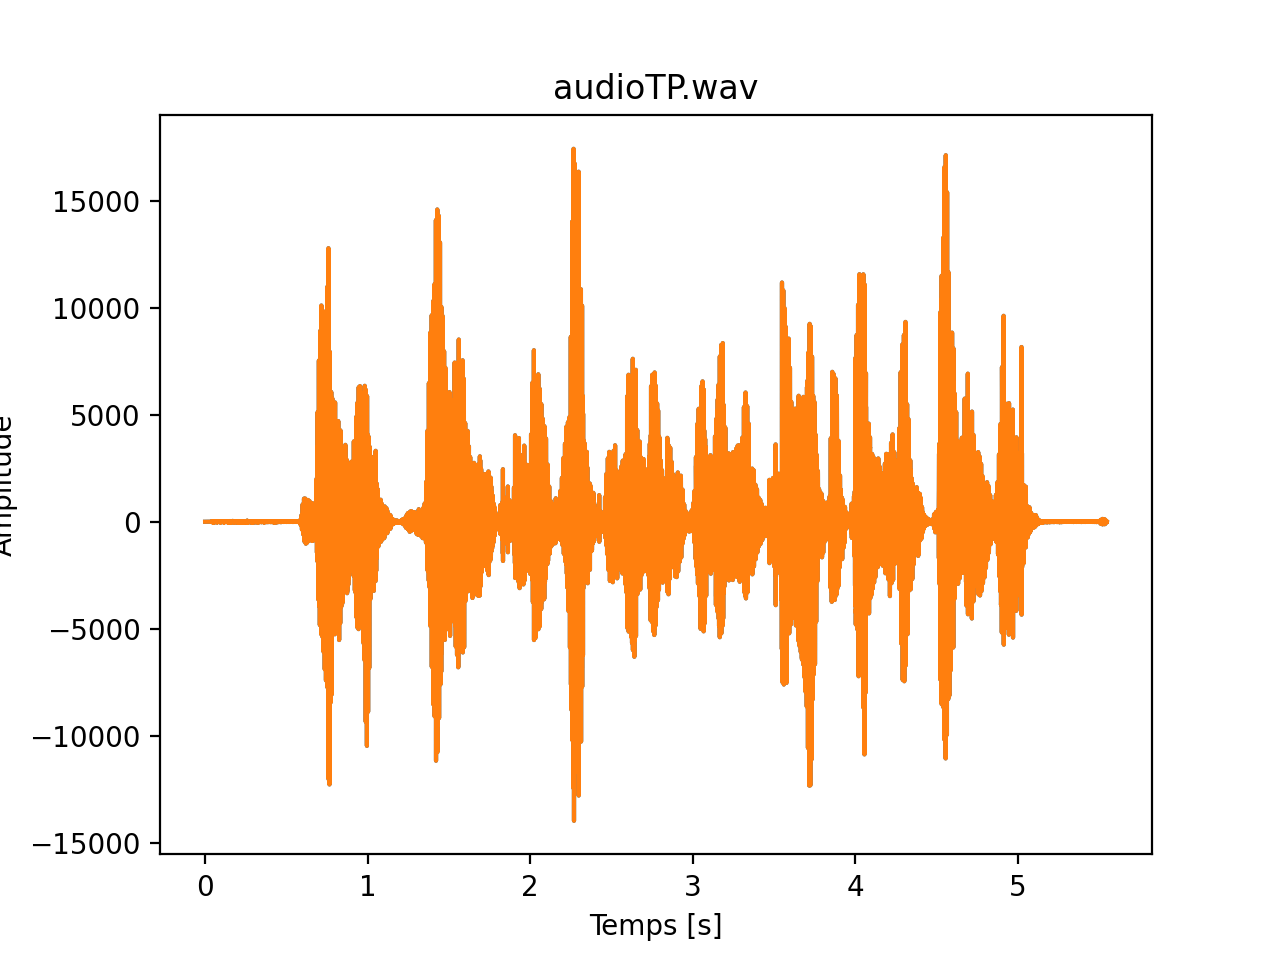

<IPython.core.display.Javascript object>


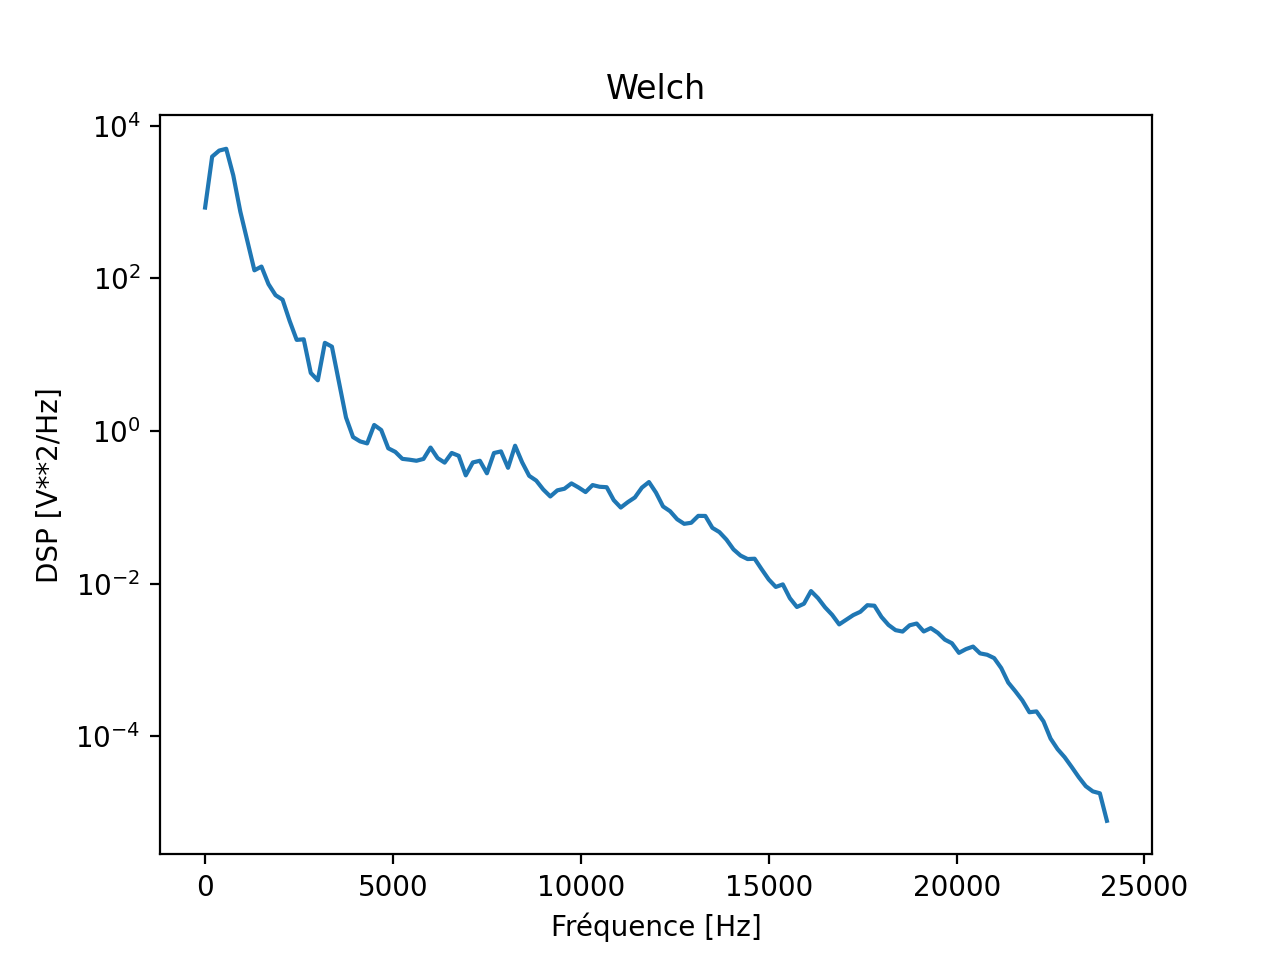

In [4]:
duration = len(data)/rate #Durée de l'enregistrement.
temps = np.arange(0,duration,1/rate) #Vecteur de temps.

#Visualisation de la forme d'onde temporelle du signal:
plt.figure(1)
plt.plot(temps,data[:])
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.title('audioTP.wav')
plt.show()

#Estimation de la DSP:
f, Pxx_den = welch(data.T[0], fs=rate, nperseg = 256)
plt.figure(2)
plt.semilogy(f, Pxx_den)
plt.xlabel('Fréquence [Hz]')
plt.ylabel('DSP [V**2/Hz]')
plt.title('Welch')
plt.show()

# Interpétation:

# Sur la figure 1, nous observons la forme d'onde temporelle du signal audio. La durée est effectivement d'environ 5,5
# secondes et l'amplitude de l'onde varie en fonction du temps.

# Sur la figure 2, nous estimons la DSP en utilisant la méthode de Welch. Nous voyons que la tendance générale est que
# plus la fréquence est élevée, plus la valeur de la DSP est faible. Cela est en accord avec les unités de la DSP (elle
# est inversement proportionnelle à la fréquence). On observe de plus que la courbe présente assez peu de variance, ce
# qui est en accord avec ce qui a été vu en cours (Welch réduit la variance du périodogramme).

<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

<IPython.core.display.Javascript object>


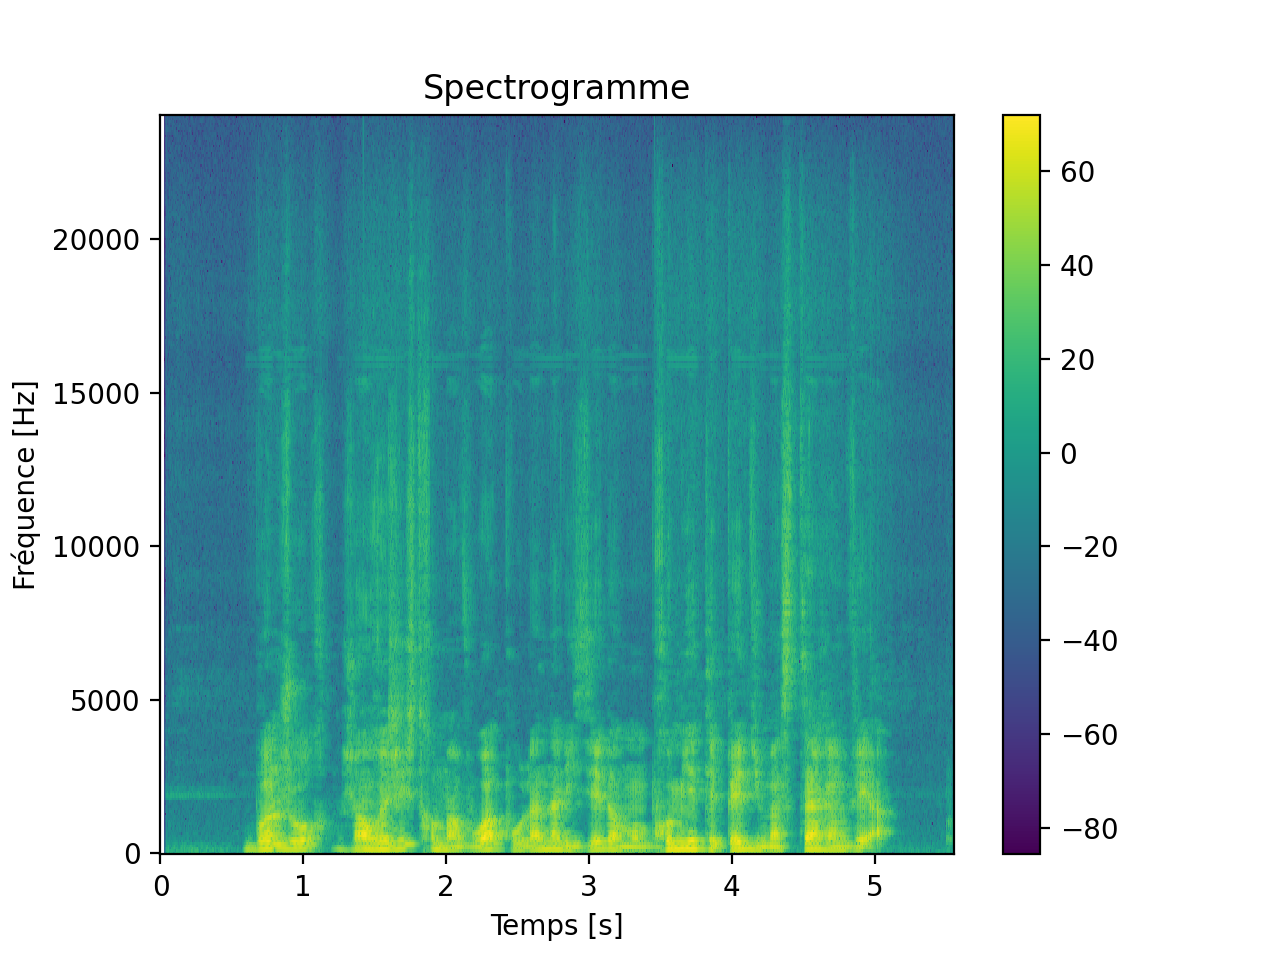

C:\Users\davfa\AppData\Local\Temp\ipykernel_18776\4127675303.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(tfct_squared), shading='auto') # On observe le logarithme de tfct_squared.


<IPython.core.display.Javascript object>


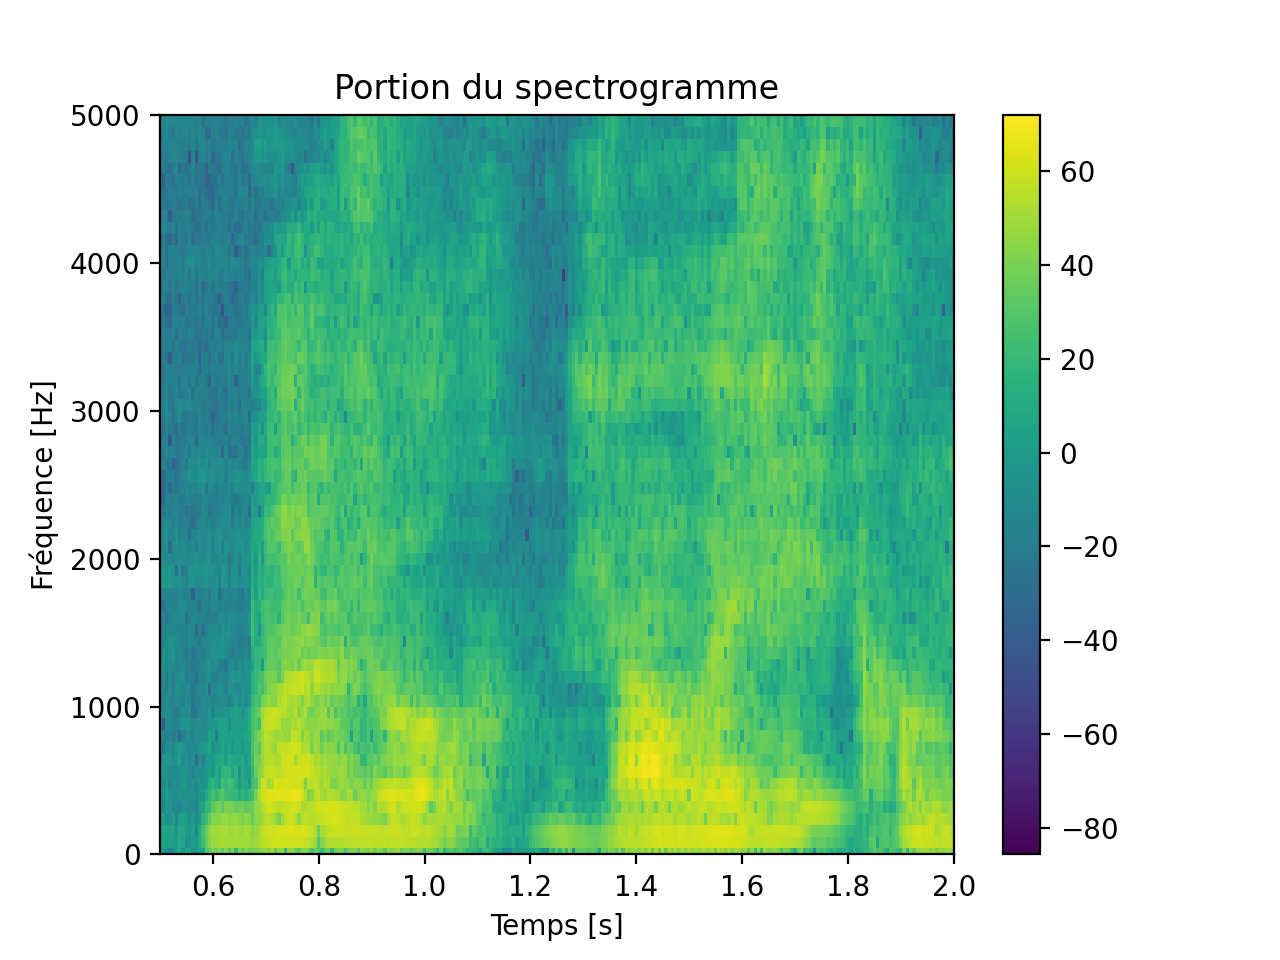

C:\Users\davfa\AppData\Local\Temp\ipykernel_18776\4127675303.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(tfct_squared), shading='auto')


In [5]:
# Calcul et affichage du spectrogramme:

# L'objectif ici est d'afficher le spectrogramme en calculant la transformée de Fourier court terme comme nous
# l'avons vu en classe (sans passer directement par la fonction plt.specgram() qui l'affiche directement).

# On calcule la transformée de Fourier court terme:
# On fixe nperseg = 600 pour avoir 600 échantillons par fenêtre. Cela nous permet observer la portion du spectrogramme
# de la figure 4 avec une meilleure précision et sans perdre d'information. Par défaut, le paramètre nfft (nombre de
# fréquences calculées par fenêtre) est égal à nperseg.

f, t, tfct = stft(data.T[0], fs=rate, nperseg=600)

plt.figure(3)
tfct_squared = np.abs(tfct)**2
plt.pcolormesh(t, f, 10 * np.log10(tfct_squared), shading='auto') # On observe le logarithme de tfct_squared.
plt.title('Spectrogramme')
plt.xlabel('Temps [s]')
plt.ylabel('Fréquence [Hz]')
plt.colorbar()
plt.show()

# On obtiendrait la même figure en exécutant la ligne de code suivante:
# plt.specgram(data.T[0], Fs=rate, NFFT = 600)


# Estimation visuelle du pitch de la voix:

plt.figure(4)
plt.pcolormesh(t, f, 10 * np.log10(tfct_squared), shading='auto')
plt.xlim(0.5,2)
plt.ylim(0,5000)
plt.title('Portion du spectrogramme')
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [s]')
plt.colorbar()
plt.show() #On voit que le pitch est autour de 500Hz.


### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle. 

Commentez.
    </div>

L'estimation du Pitch est: 200.0


<IPython.core.display.Javascript object>


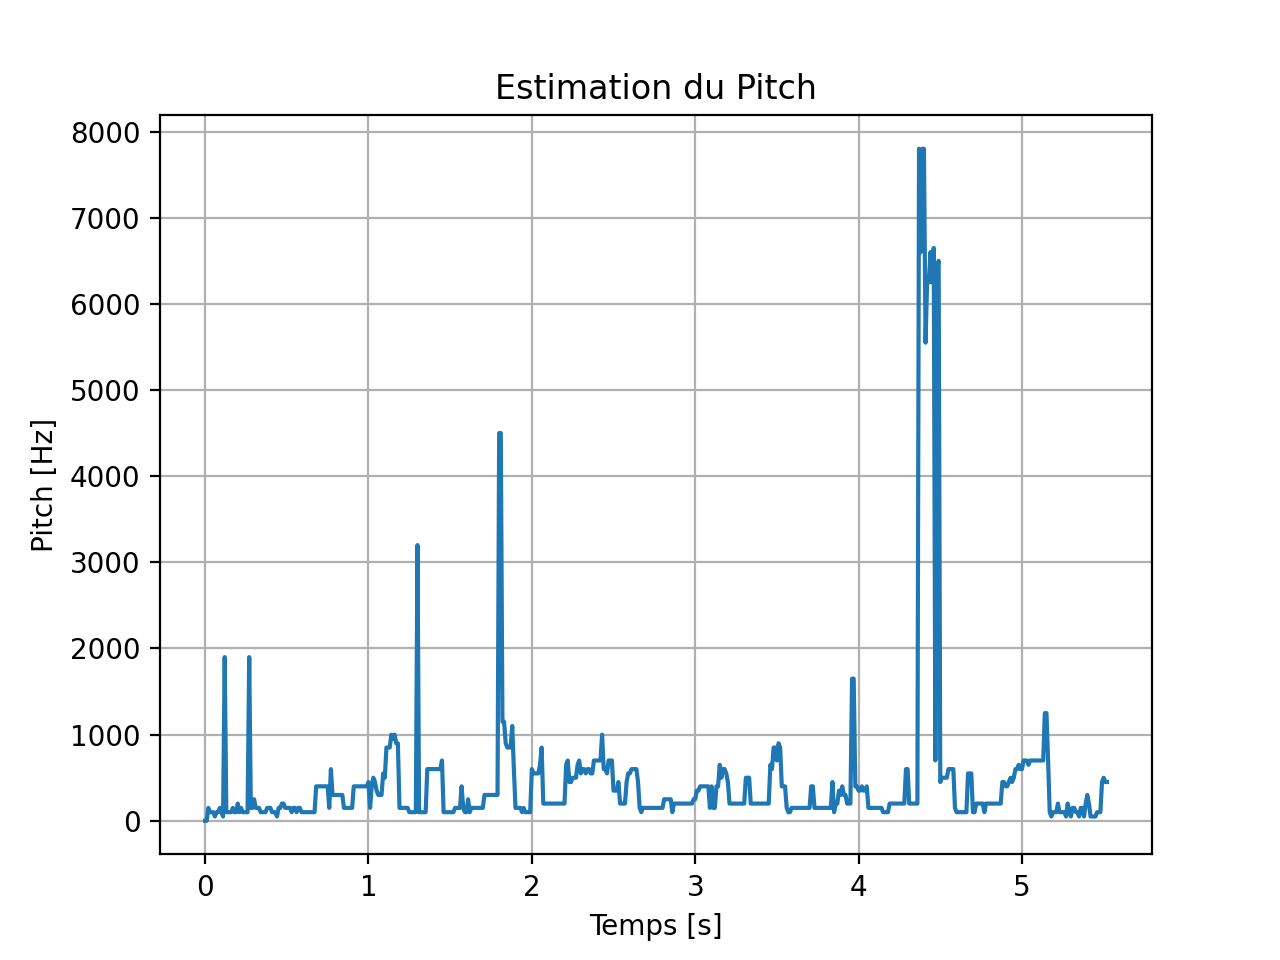

In [6]:
# Idée: utiliser le spectrogramme et trouver la fréquence dominante à chaque instant.

fen_length = int(0.02 * rate)  # Durée de la fenêtre de 20 ms
overlap = int(0.01 * rate)          # Chevauchement de 10 ms

pitches = []

for i in range(0, len(data.T[0]) - fen_length, overlap):
    fen = data.T[0][i:i + fen_length]
    f, t, Sxx = spectrogram(fen, fs=rate, nperseg=fen_length, noverlap=overlap)    
    pitch = f[np.argmax(Sxx, axis=0)] #On trouve les fréquences dominantes.
    pitches.append(pitch)


print("L'estimation du Pitch est:",np.median(pitches)) #On utilise la médiane pour éviter l'effet des pics sur la moyenne.
    
temps = np.arange(0, len(pitches) * overlap, overlap) / rate

# Tracez les variations du pitch le long du signal
plt.plot(temps, pitches)
plt.xlabel('Temps [s]')
plt.ylabel('Pitch [Hz]')
plt.title('Estimation du Pitch')
plt.grid()
plt.show()


## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz. 
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz. 
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon. 

</div>

In [7]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil: 
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

In [8]:
def contient_impulsion_energie(signal,seuil):
    
    signal_squared = signal**2 # On a besoin du carré du signal pour calculer l'énergie.
    noyau = 1/20 * np.ones(20) # Noyau de convolution de taille 20.
    energie = np.convolve(signal_squared, noyau) # On effectue la convolution.
    
    # On compare les valeurs obtenues avec le seuil:
    
    if np.abs(np.mean(energie)-np.max(energie)) < seuil: #Si l'amplitude calculée ne dépasse pas le seuil = pas d'impulsion.
        imp = False
    else:
        imp = True
        
    return imp

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non. 
</div>

In [9]:
seuil = 0.45 #On teste la méthode avec ce seuil.
imp = [contient_impulsion_energie(signaux[p,:], seuil) for p in range(10000)] 

<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

In [10]:
VP = 0
FP = 0
VN = 0
FN = 0

n = len(imp) # = len(labels)

for i in range(0,n):
    if imp[i]==True:
        if labels[i]==True:
            VP+=1
        else:
            FP+=1
    else:
        if labels[i]==True:
            FN+=1
        else:
            VN+=1
            
print("VP=",VP,", FP=",FP, ", VN=", VN, ", FN=",FN)  
print("Précision=",VP/(VP+FP))
print("Rappel=",VP/(VP+FN))

VP= 4897 , FP= 518 , VN= 4478 , FN= 107
Précision= 0.9043397968605725
Rappel= 0.978617106314948


## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


In [11]:
def contient_impulsion_spectrogramme(signal, seuil):
    seuil*=0.01 #Pour que le seuil ait le même ordre de grandeur dans les 2 méthodes.
    f, t, Sxx = spectrogram(signal, fs=1000)
    if np.abs(np.mean(Sxx)-np.max(Sxx)) > seuil:
        imp2 = True
    else:
        imp2 = False
    return imp2

<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

In [12]:
seuil = 0.5 #On teste la méthode avec ce seuil.
imp2 = [contient_impulsion_spectrogramme(signaux[p,:], seuil) for p in range(10000)] 

VP = 0
FP = 0
VN = 0
FN = 0

n = len(imp2) # = len(labels)

for i in range(0,n):
    if imp2[i]==True:
        if labels[i]==True:
            VP+=1
        else:
            FP+=1
    else:
        if labels[i]==True:
            FN+=1
        else:
            VN+=1
            
print("VP=",VP,", FP=",FP, ", VN=", VN, ", FN=",FN)  
print("Précision=",VP/(VP+FP))
print("Rappel=",VP/(VP+FN))

VP= 4451 , FP= 395 , VN= 4601 , FN= 553
Précision= 0.9184894758563764
Rappel= 0.8894884092725819


## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme: 
$$ \frac{VP}{VP + FP}$$
et le rappel comme:
$$ \frac{VP}{VP +FN} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

Le numérateur des deux métriques est le même, alors que le dénominateur varie. 

Dans les deux cas, le numérateur contient le nombre de signaux détectés comme contenant une impulsion qui contiennent effectivement une impulsion. 

Cependant, dans le cas de la précision, le dénominateur contient le nombre total de signaux détectés par nos méthodes comme contenant une impulsion. Dans le cas du rappel, le dénominateur contient le nombre total de signaux labellisés comme contenant une impulsion.

L'objectif est donc de maximiser ces deux métriques: une méthode parfaite obtiendrait précision = rappel = 1.

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils. 

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat. 
    </div>

In [13]:
# Fonction qui calcule la précision et le rappel:

def calcul(imp, labels):
    VP = 0
    FP = 0
    VN = 0
    FN = 0

    n = len(imp) 

    for i in range(0,n):
        if imp[i]==True:
            if labels[i]==True:
                VP+=1
            else:
                FP+=1
        else:
            if labels[i]==True:
                FN+=1
            else:
                VN+=1
    
    precision = VP/(VP+FP)
    rappel = VP/(VP+FN)
    
    return precision, rappel



# On fait varier le seuil pour chacune des méthodes:

seuil = np.arange(0.4,0.51,0.01) #Seuils 0.4, 0.41, 0.42, ..., 0.5
precision1 = []
rappel1 = []
precision2 = []
rappel2 = []

for i in seuil:
    imp1 = [contient_impulsion_energie(signaux[p,:], i) for p in range(10000)] 
    imp2 = [contient_impulsion_spectrogramme(signaux[p,:], i) for p in range(10000)] 
    
    prec1, rap1 = calcul(imp1, labels)
    prec2, rap2 = calcul(imp2, labels)
    
    precision1.append(prec1)
    rappel1.append(rap1)
    
    precision2.append(prec2)
    rappel2.append(rap2)

print("Précisions pour la méthode 1:",precision1)
print("\n Rappels pour la méthode 1:",rappel1)
print("\n Précisions pour la méthode 2:",precision2)
print("\n Rappels pour la méthode 2:",rappel2)


Précisions pour la méthode 1: [0.8620990237099023, 0.870507399577167, 0.8803708325904795, 0.888768703803858, 0.8976090527468517, 0.9043397968605725, 0.9122774133083411, 0.9186002282236592, 0.923942568878541, 0.9300198807157057, 0.9360310647864296]

 Rappels pour la méthode 1: [0.9882094324540368, 0.987410071942446, 0.986810551558753, 0.9852118305355716, 0.9828137490007993, 0.978617106314948, 0.9726219024780176, 0.9652278177458034, 0.951638689048761, 0.9348521183053558, 0.9152677857713829]

 Précisions pour la méthode 2: [0.8378830083565459, 0.8473684210526315, 0.8575780654988576, 0.8668336866448256, 0.8766829268292683, 0.8819253438113949, 0.8897715988083416, 0.8977546110665597, 0.9043953818108162, 0.9124207080008185, 0.9184894758563764]

 Rappels pour la méthode 2: [0.9016786570743405, 0.9008792965627498, 0.9000799360511591, 0.898880895283773, 0.8978816946442846, 0.8970823341326939, 0.8952837729816147, 0.8948840927258194, 0.8922861710631494, 0.8910871302957634, 0.8894884092725819]


<IPython.core.display.Javascript object>


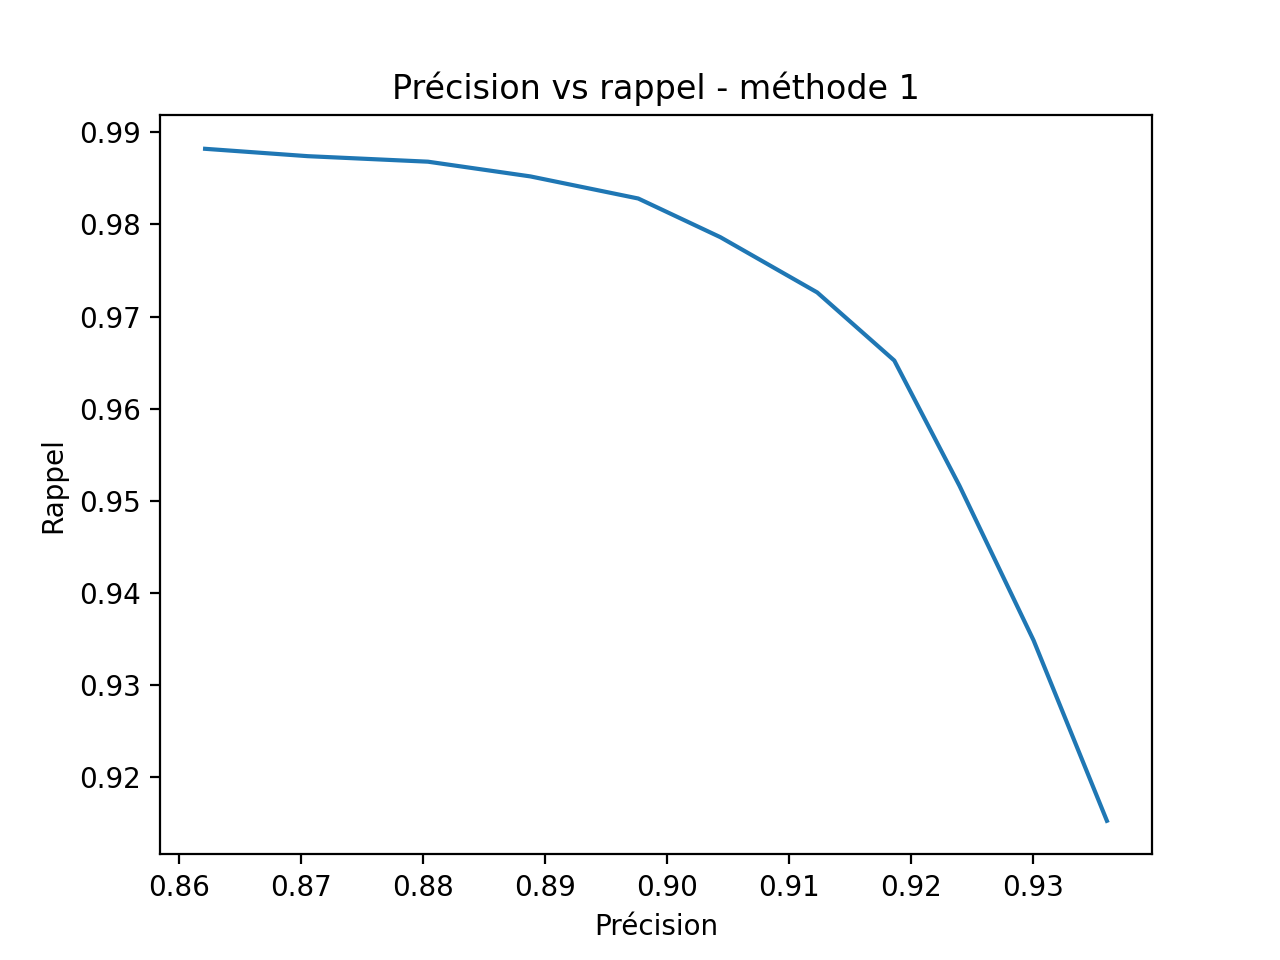

<IPython.core.display.Javascript object>


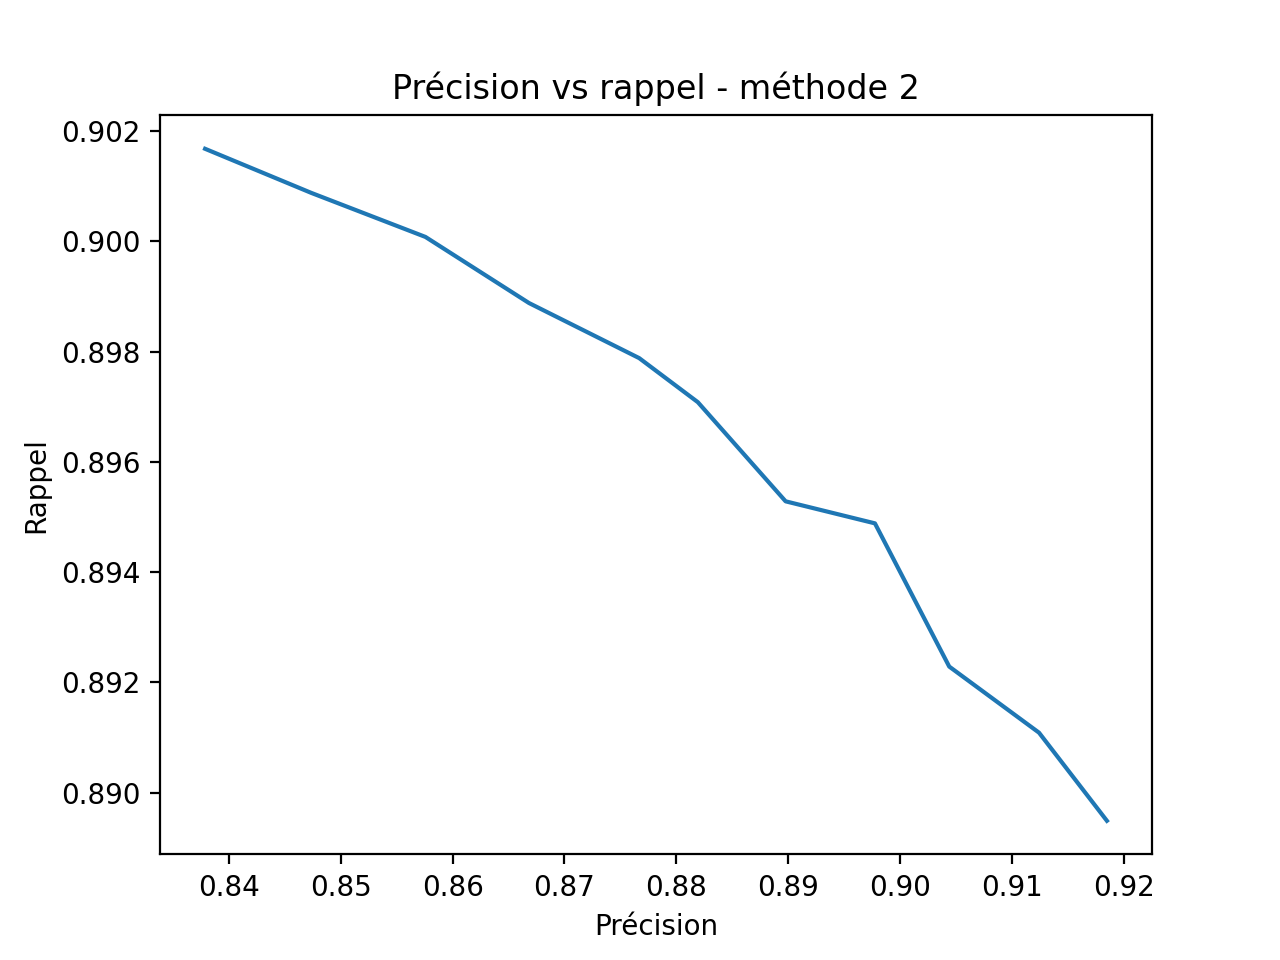

In [14]:
# Affichage du plan (précision,rappel) pour les différents seuils considérés:

plt.figure(7)
plt.title('Précision vs rappel - méthode 1')
plt.xlabel('Précision')
plt.ylabel('Rappel')
plt.plot(precision1,rappel1)

plt.figure(8)
plt.title('Précision vs rappel - méthode 2')
plt.xlabel('Précision')
plt.ylabel('Rappel')
plt.plot(precision2,rappel2)

# On observe que, dans les deux cas, plus la précision est élevée et plus le rappel est faible. Cela illustre bien la
# difficulté de trouver une méthode avec un seuil et un rappel optimaux.
# Cependant, la courbe de la méthode 2 présente une tendance plus linéaire que la méthode 1. Selon les graphiques,
# il semblerait que la méthode 1 maximise plus la valeur précision + rappel que la méthode 2.